# Problem 4
For this problem, you need to use the built-in sklearn digits dataset. You can load this data using Sklearn.datasets.load_digits (*, n_class=10,return_X_y=False, as_frame=False) Divide the data into training and test sets using train_test_split and random_state=0 The goal is to train a Random Forest classifier and optimize its performance on this data.
1. Identify the most important parameters that affect the performance of the Random Forest classifier and outline your experimental design (using 4-fold cross validation) to learn the optimal values for these parameters.
2. Analyze the results of the classifier using its optimal parameters and comment on its generalization capability.
3. Visualize and explain the relevant features identified by the Random Forest classifier.
+ Create a white 8x8 image that represents the original 64 features. Map each identified relevant feature to this 2D image and display it using a grey scale that reflects its importance (e.g. 0 most relevant feature and 255  least relevant feature).
4. Identify one misclassified sample from each class (if they exist). Visualize each misclassified sample as an 8x8 image, and use its nearest neighbors and the learned important features to explain why it was misclassified.

Hint: for examples on how to read this data and visualize it, check
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glrauto-examples-classification-plot-digits-classification-py

## Import and setup data

In [509]:
import heapq

import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn_evaluation
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

digits = sklearn.datasets.load_digits(n_class=10, return_X_y=False, as_frame=False)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    random_state=0
)
print(len(X_train))
print(len(X_test))

1347
450


## Train Random Forest classifier

### General methods for training

In [499]:
np.random.seed(42)


def grid_search_random_forest(
        n_estimators,
        max_features,
        max_depth=None,
        max_leaf_nodes=None
):
    parameters = {
        'n_estimators': n_estimators,
        'max_features': max_features,
    }
    include_additional_parameters(max_depth, max_leaf_nodes, parameters)

    classifier = RandomForestClassifier(random_state=0)

    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,
    )

    grid_search.fit(X_train, y_train)
    print_grid_search_results(grid_search, parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))


def include_additional_parameters(max_depth, max_leaf_nodes, parameters):
    if max_depth is not None:
        parameters.update({'max_depth': max_depth})
    if max_leaf_nodes is not None:
        parameters.update({'max_leaf_nodes': max_leaf_nodes})


def graph_grid_search_random_forest(grid_search):
    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=("n_estimators", "max_features")
    )

    plt.title("Random Forest")
    plt.xlabel("n_estimators")
    plt.ylabel("max_features")
    plt.legend()
    plt.show()

### Start finding optimal parameters
use 4-fold cross validation and heatmaps to determine best params. keep track of times in case coomputing resources in jeopardy

### Trial 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best n_estimators: 40
Best max_features: 3
Accuracy:  0.9622222222222222
CPU times: user 4.42 s, sys: 46.8 ms, total: 4.46 s
Wall time: 4.49 s


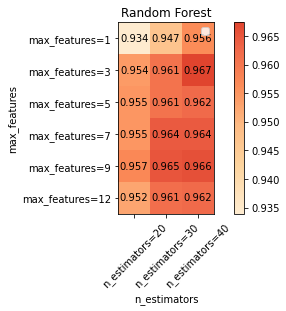

In [502]:
np.random.seed(42)

n_estimators = np.linspace(20, 40, 3, dtype=int)
max_features = np.linspace(1, 12, 6, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )
graph_grid_search_random_forest(grid_search)

### Trial 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best n_estimators: 100
Best max_features: 8
Accuracy:  0.9755555555555555
CPU times: user 12.8 s, sys: 104 ms, total: 12.9 s
Wall time: 13.1 s


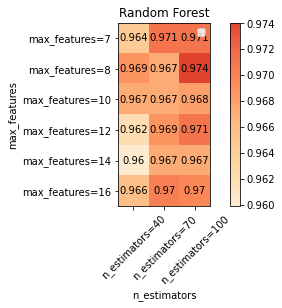

In [505]:
np.random.seed(42)

n_estimators = np.linspace(40, 100, 3, dtype=int)
max_features = np.linspace(7, 16, 6, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )
graph_grid_search_random_forest(grid_search)

### Trial 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best n_estimators: 80
Best max_features: 11
Accuracy:  0.98
CPU times: user 17.9 s, sys: 137 ms, total: 18 s
Wall time: 18.2 s


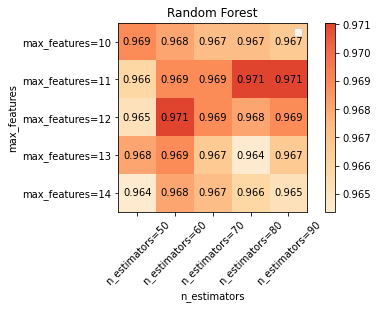

In [506]:
np.random.seed(42)

n_estimators = np.linspace(50, 90, 5, dtype=int)
max_features = np.linspace(10, 14, 5, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )
graph_grid_search_random_forest(grid_search)

### Trial 4 with Pruning

In [459]:
np.random.seed(42)

n_estimators = np.linspace(50, 90, 5, dtype=int)
max_features = np.linspace(10, 14, 5, dtype=int)
max_depth = np.linspace(5, 50, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth)

Best n_estimators:  80
Best max_features:  11
Best max_depth:  16
Accuracy:  0.98
CPU times: user 1min 18s, sys: 593 ms, total: 1min 18s
Wall time: 1min 22s


### Trial 5 more pruning

Best n_estimators: 120
Best max_features: 11
Best max_depth: 16
Accuracy:  0.9777777777777777


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best n_estimators: 120
Best max_features: 11
Best max_depth: 16
Accuracy:  0.9777777777777777


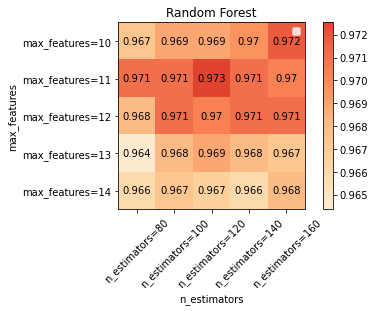

In [508]:
np.random.seed(42)

n_estimators = np.linspace(80, 160, 5, dtype=int)
max_features = np.linspace(10, 14, 5, dtype=int)
max_depth = np.linspace(16, 16, 1, dtype=int)

grid_search = grid_search_random_forest(n_estimators, max_features, max_depth)
graph_grid_search_random_forest(grid_search)

In [144]:
np.random.seed(42)

n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(9, 15, 6, dtype=int)
max_depth = np.linspace(5, 50, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth)

Best n_estimators:  80
Best max_features:  11
Best max_depth:  16
Accuracy:  0.98
CPU times: user 1min 7s, sys: 504 ms, total: 1min 7s
Wall time: 1min 8s


In [145]:
np.random.seed(42)

n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(9, 15, 3, dtype=int)
max_depth = np.linspace(10, 30, 3, dtype=int)
max_leaf_nodes = np.linspace(1, 50, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes)

Best n_estimators:  80
Best max_features:  9
Best max_depth:  20
Best max_leaf_nodes:  50
Accuracy:  0.9533333333333334
CPU times: user 1min 9s, sys: 352 ms, total: 1min 10s
Wall time: 1min 10s


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/

In [146]:
np.random.seed(42)

n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(12, 18, 3, dtype=int)
max_depth = np.linspace(5, 15, 3, dtype=int)
max_leaf_nodes = np.linspace(40, 140, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes)

Best n_estimators:  100
Best max_features:  15
Best max_depth:  15
Best max_leaf_nodes:  115
Accuracy:  0.9711111111111111
CPU times: user 1min 36s, sys: 454 ms, total: 1min 36s
Wall time: 1min 36s


## Test the trained model
use the optimal hyperparameters to set on a final random forest to use throughout the subsequent modeling

In [530]:
np.random.seed(42)

rf = RandomForestClassifier(
    n_estimators=100,
    max_features=12,
    max_depth=15,
    oob_score=True
)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
print("Train: ", rf.score(X_train, y_train))
print("Test: ", rf.score(X_test, y_test))

Train:  1.0
Test:  0.9622222222222222


In [533]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Train: ", dt.score(X_train, y_train))
print("Test: ", dt.score(X_test, y_test))

Train:  1.0
Test:  0.8511111111111112


## Feature Importance

In [549]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances)

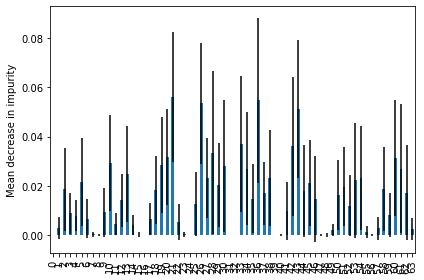

In [550]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plot the feature importance
Plot the forest feature importances via mean decrease in impurity

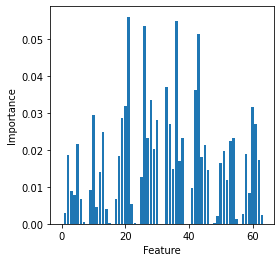

In [551]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.bar([x for x in range(len(importances))], importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

collect most important feature and sum their importance

In [552]:
import heapq

count_over_threshold = sum(map(lambda x: x >= 0.03, importances))
most_important = heapq.nlargest(count_over_threshold, importances)
least_important = heapq.nsmallest(45, importances)

indices_of_most_important_features = []
for item in most_important:
    correct_actual_item_index = np.argwhere(importances == item)
    indices_of_most_important_features.append(correct_actual_item_index[0][0])

print(indices_of_most_important_features)
print(f'Most important count: {len(most_important)}')
print(f'Most important sum: {len(most_important)}')
print('Least 45 sum:', sum(least_important))

[21, 36, 26, 43, 33, 42, 28, 20, 60]
Most important count: 9
Most important sum: 9
Least 45 sum: 0.35864761606161644


### Confusion Matrix
test the viability of the model, accuracy etc

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  1  0  0  0  1]
 [ 1  1 40  1  0  0  0  0  0  1]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  2  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  0  1 45  0]
 [ 0  0  0  2  0  1  0  0  0 44]]


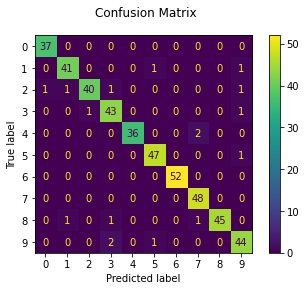

In [553]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Analyze Misclassified

general functions

In [579]:
def map_importance_mask_over_digit_image(
        item_to_display_1d,
        mask_over_item_1d,
        expected_result,
        actual_result
):
    importance_mask = mask_over_item_1d.reshape(8, 8)
    display_item_in_8x8(plt, item_to_display_1d, expected_result, actual_result)

    display_mask_over_image(importance_mask)


def display_mask_over_image(importance_mask):
    plt.imshow(
        importance_mask,
        cmap=plt.cm.gray_r,
        interpolation='none',
        vmin=0,
        vmax=1,
        aspect='equal',
        alpha=0
    )

    def rect(pos):
        r = plt.Rectangle(pos - 0.5, 1, 1, facecolor="none", edgecolor="cyan", linewidth=2)
        plt.gca().add_patch(r)

    x, y = np.meshgrid(np.arange(importance_mask.shape[1]), np.arange(importance_mask.shape[0]))
    m = np.c_[x[importance_mask.astype(bool)], y[importance_mask.astype(bool)]]
    for pos in m:
        rect(pos)
    plt.show()


def display_item_in_8x8(plt, item_to_display_1d, expected_result, actual_result):
    misclassified_image = item_to_display_1d.reshape(8, 8)
    _, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    axes.set_axis_off()
    axes.imshow(
        misclassified_image,
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )
    ax.set_title(f"Expected: {expected_result}\nActual: {actual_result}")

def map_misclassification_analysis(
        correct_expected_item_index,
        misclassifed_item_index,
        correct_actual_item_index,
):
    map_importance_mask_over_digit_image(
        X_train[correct_expected_item_index],
        importance_mask_1d,
        y_train[correct_expected_item_index],
        y_train[correct_expected_item_index]
    )

    map_importance_mask_over_digit_image(
        X_test[misclassifed_item_index],
        importance_mask_1d,
        y_test[misclassifed_item_index],
        y_predictions[misclassifed_item_index]
    )

    map_importance_mask_over_digit_image(
        X_train[correct_actual_item_index],
        importance_mask_1d,
        y_train[correct_actual_item_index],
        y_train[correct_actual_item_index]
    )

In [577]:
misclassified_indices = np.where((y_predictions != y_test))
print(misclassified_indices)


def generate_most_important_mask():
    global importance_image, i, importance_mask_1d
    importance_image = []
    for i in range(0, 64):
        importance_image.append(0)
        if indices_of_most_important_features.__contains__(i):
            importance_image[i] = 1
    return np.array(importance_image)

importance_mask_1d = generate_most_important_mask()

(array([117, 124, 130, 131, 158, 169, 181, 211, 212, 213, 220, 275, 315,
       331, 378, 427, 430]),)


In [292]:
indices_of_correct_8 = np.where((y_predictions == y_test) & (y_predictions == 8))
print(indices_of_correct_8)

indices_of_correct_1 = np.where((y_predictions == y_test) & (y_predictions == 1))
print(indices_of_correct_1)

(array([  1,   8,  11,  19,  20,  22,  33,  40,  70,  75,  97,  99, 112,
       116, 141, 156, 166, 169, 177, 193, 196, 218, 246, 268, 277, 278,
       279, 313, 316, 318, 329, 335, 352, 358, 359, 366, 367, 377, 398,
       400, 402, 411, 435, 437]),)
(array([  6,  16,  37,  39,  44,  49,  57,  64,  69,  73,  88,  93, 107,
       128, 145, 147, 151, 155, 171, 174, 202, 213, 216, 229, 240, 241,
       261, 301, 325, 327, 331, 339, 341, 348, 349, 380, 408, 416, 420,
       434, 441, 444, 448]),)


In [477]:
np.random.seed(42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Train: ', knn.score(X_train, y_train))
print('Test: ', knn.score(X_test, y_test))

# knn_predictions = knn.predict(X_test, y_test)

distances, neighbor_indices = knn.kneighbors(X_test[misclassified_indices[0]])

print(neighbor_indices)
# print(misclassified_indices[0])
v_misclass = np.vstack(misclassified_indices[0])
print(v_misclass)
# neighbor_indices = np.array(neighbor_indices)
# print(neighbor_indices)
# misclass = np.array(misclassified_indices[0])
# print(misclass)
neighbor_map = np.concatenate((v_misclass, neighbor_indices), 1)
neighbor_map

Train:  0.991833704528582
Test:  0.9866666666666667
[[1127 1051  325]
 [ 365  942 1286]
 [1192  345  765]
 [ 215 1275  135]
 [1145 1084 1076]
 [ 926 1267 1141]
 [1190  887  418]
 [ 454   94  787]
 [ 398  120 1236]]
[[117]
 [122]
 [124]
 [130]
 [181]
 [275]
 [315]
 [331]
 [378]]


array([[ 117, 1127, 1051,  325],
       [ 122,  365,  942, 1286],
       [ 124, 1192,  345,  765],
       [ 130,  215, 1275,  135],
       [ 181, 1145, 1084, 1076],
       [ 275,  926, 1267, 1141],
       [ 315, 1190,  887,  418],
       [ 331,  454,   94,  787],
       [ 378,  398,  120, 1236]])

In [382]:
indices_of_misclassified_by_number = np.where(
    (y_predictions != y_test) & (y_test == 9)
)
print(indices_of_misclassified_by_number)

(array([130]),)


show the most important features heatmap and the feature mask

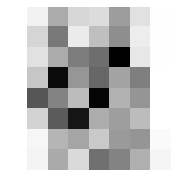

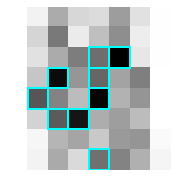

In [580]:
no_mask = np.array(np.zeros(64))
map_importance_mask_over_digit_image(
    importances,
    no_mask,
    '0-9',
    '0-9'
)

map_importance_mask_over_digit_image(
    importances,
    importance_mask_1d,
    '0-9',
    '0-9'
)

In [404]:
indices = neighbor_indices

print(y_test[misclassified_indices[0]])
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(3):
    columns += ["Neigbor#{}_idx".format(i + 1), "Neigbor#{}_True Class".format(i + 1),
        "Neigbor#{}_Distance".format(i + 1)]

print(columns)
df = pd.DataFrame(columns=columns)

df["Misclassified Test idx"] = misclassified_indices[0]
df["True Class"] = y_test[misclassified_indices[0]]
df["Pred Class"] = y_predictions[misclassified_indices[0]]
for i in range(3):
    df["Neigbor#{}_idx".format(i + 1)] = indices[:, i]
    df["Neigbor#{}_True Class".format(i + 1)] = y_train[indices[:, i]]
    df["Neigbor#{}_Distance".format(i + 1)] = np.around(distances[:, i], decimals=2)

df

[5 2 8 8 9 8 8 5 2 4 3]
['Misclassified Test idx', 'True Class', 'Pred Class', 'Neigbor#1_idx', 'Neigbor#1_True Class', 'Neigbor#1_Distance', 'Neigbor#2_idx', 'Neigbor#2_True Class', 'Neigbor#2_Distance', 'Neigbor#3_idx', 'Neigbor#3_True Class', 'Neigbor#3_Distance']


,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,56,5,9,157,5,25.51,350,5,26.66,498,5,26.70
1,117,2,0,1127,2,26.68,1051,2,27.73,325,2,29.82
2,122,8,3,365,8,23.60,942,3,26.46,1286,6,27.11
3,124,8,1,1192,8,23.45,345,8,25.28,765,1,28.88
4,130,9,5,215,3,25.26,1275,9,26.13,135,9,26.15
5,158,8,7,862,8,24.25,564,8,26.81,868,7,27.64
6,167,8,1,791,8,16.55,142,1,19.54,347,8,19.82
7,181,5,9,1145,9,22.20,1084,9,22.65,1076,9,24.06
8,275,2,1,926,2,19.77,1267,2,21.33,1141,2,25.75
9,315,4,7,1190,4,20.59,887,7,24.88,418,7,25.10


In [409]:
# (expect_true_neighbor, actual_false, actual_neighbor)


Analyze Class 2

(array([  18,   21,   32,   43,   48,   61,   78,   86,  104,  108,  129,
        138,  195,  199,  206,  227,  240,  241,  243,  244,  254,  259,
        261,  272,  278,  279,  290,  292,  294,  297,  298,  304,  306,
        309,  311,  316,  323,  336,  348,  358,  362,  363,  366,  371,
        382,  383,  385,  412,  413,  424,  436,  437,  452,  472,  487,
        488,  493,  503,  506,  509,  521,  539,  546,  578,  582,  597,
        603,  617,  624,  627,  634,  644,  648,  649,  676,  685,  692,
        694,  707,  722,  727,  734,  736,  737,  744,  745,  753,  756,
        773,  778,  782,  805,  814,  823,  834,  847,  858,  867,  891,
        892,  895,  897,  903,  910,  913,  919,  943,  950,  958,  970,
        991, 1006, 1025, 1038, 1057, 1064, 1098, 1103, 1105, 1115, 1117,
       1120, 1121, 1146, 1175, 1184, 1186, 1198, 1199, 1201, 1203, 1206,
       1210, 1213, 1230, 1246, 1264, 1273, 1278, 1283, 1318]),)


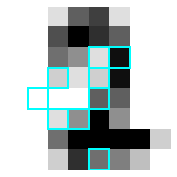

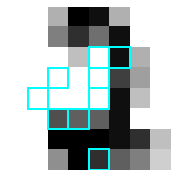

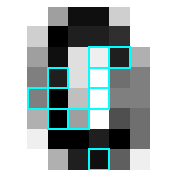

In [574]:
# (expect_true_neighbor, actual_false, actual_neighbor)
indices_of_correct_number = np.where(y_train == 0)
print(indices_of_correct_number)

map_misclassification_analysis(1051, 117, 18)

Analyze Class 4

(array([   8,   29,   36,   40,   47,   59,   60,   67,   82,   91,  156,
        163,  169,  173,  183,  184,  196,  197,  207,  214,  215,  232,
        238,  245,  248,  271,  283,  296,  302,  307,  312,  313,  318,
        320,  339,  342,  344,  346,  349,  355,  376,  387,  397,  398,
        419,  429,  431,  433,  462,  477,  490,  511,  516,  529,  530,
        540,  554,  567,  570,  572,  573,  587,  593,  601,  608,  611,
        615,  621,  625,  628,  632,  638,  654,  671,  684,  696,  697,
        731,  748,  761,  772,  775,  777,  783,  820,  825,  833,  843,
        857,  863,  876,  878,  881,  883,  884,  888,  911,  933,  937,
        938,  942,  960,  965,  966,  974,  995,  997,  999, 1023, 1027,
       1055, 1072, 1078, 1090, 1091, 1092, 1116, 1130, 1131, 1136, 1156,
       1158, 1164, 1211, 1214, 1231, 1236, 1253, 1259, 1263, 1266, 1305,
       1311, 1323, 1328, 1334, 1342, 1343]),)


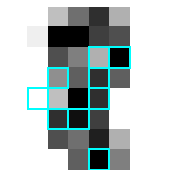

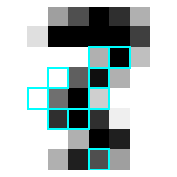

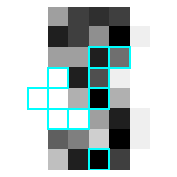

In [573]:
indices_of_correct_number = np.where(y_train == 3)
print(indices_of_correct_number)

map_misclassification_analysis(120, 378, 36)

(array([   6,   24,   28,   30,   33,   41,   58,   71,   75,   76,   99,
        118,  153,  154,  160,  175,  176,  180,  186,  191,  193,  213,
        228,  231,  249,  277,  284,  300,  310,  324,  364,  400,  401,
        410,  416,  417,  425,  439,  450,  453,  459,  466,  475,  478,
        480,  489,  495,  501,  510,  517,  524,  526,  532,  533,  542,
        545,  558,  566,  568,  569,  574,  584,  604,  629,  652,  666,
        672,  683,  705,  728,  743,  755,  767,  769,  771,  774,  780,
        792,  793,  796,  798,  806,  822,  852,  859,  864,  880,  882,
        886,  900,  906,  912,  916,  917,  921,  944,  949,  951,  977,
        989, 1011, 1012, 1022, 1041, 1042, 1058, 1059, 1065, 1079, 1080,
       1082, 1083, 1106, 1112, 1119, 1125, 1132, 1133, 1140, 1162, 1165,
       1171, 1173, 1182, 1190, 1212, 1219, 1232, 1240, 1255, 1276, 1280,
       1281, 1284, 1290, 1291, 1295, 1304, 1307, 1325, 1335, 1338, 1340]),)


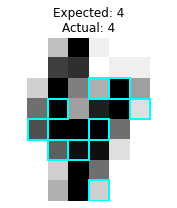

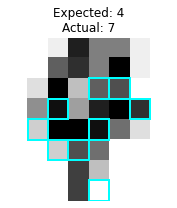

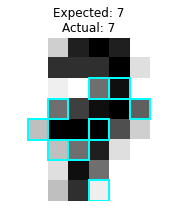

In [436]:
indices_of_correct_number = np.where(y_train == 4)
print(indices_of_correct_number)

map_misclassification_analysis(41, 315, 418)

(array([  12,   15,   22,   34,   42,   45,   52,   68,   69,   94,  112,
        124,  128,  131,  132,  136,  139,  148,  149,  157,  164,  167,
        168,  171,  174,  178,  204,  209,  212,  224,  235,  236,  237,
        239,  242,  246,  251,  253,  258,  260,  265,  270,  288,  301,
        317,  322,  329,  350,  351,  353,  361,  367,  370,  373,  381,
        411,  430,  442,  446,  448,  456,  473,  485,  498,  502,  507,
        508,  519,  525,  547,  559,  561,  571,  595,  616,  620,  635,
        653,  657,  665,  681,  686,  693,  698,  700,  706,  741,  746,
        747,  787,  797,  799,  813,  831,  841,  842,  846,  853,  885,
        932,  935,  964,  978,  983,  984, 1015, 1026, 1029, 1046, 1068,
       1075, 1099, 1143, 1177, 1187, 1202, 1204, 1215, 1221, 1224, 1225,
       1239, 1242, 1258, 1260, 1268, 1301, 1303, 1310, 1314, 1315, 1326,
       1330, 1341]),)


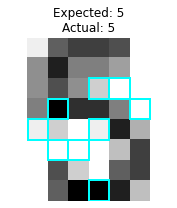

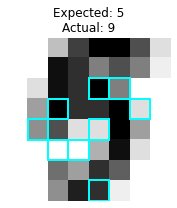

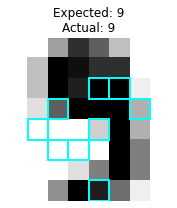

In [437]:
indices_of_correct_number = np.where(y_train == 5)
print(indices_of_correct_number)

map_misclassification_analysis(12, 56, 1145)

(array([   5,   25,   38,   51,   55,   65,   66,   79,   84,   93,   95,
        100,  107,  110,  117,  126,  141,  142,  147,  152,  155,  166,
        179,  181,  185,  222,  223,  226,  229,  257,  281,  282,  285,
        289,  328,  332,  337,  338,  354,  356,  357,  359,  391,  392,
        394,  420,  421,  449,  454,  455,  458,  484,  492,  504,  531,
        537,  538,  551,  555,  565,  580,  585,  598,  614,  622,  630,
        633,  655,  670,  678,  699,  701,  708,  740,  751,  757,  764,
        765,  776,  801,  807,  811,  819,  826,  836,  838,  839,  855,
        861,  866,  873,  877,  893,  894,  904,  908,  928,  936,  939,
        945,  956,  969,  975,  982,  994,  996, 1002, 1005, 1014, 1016,
       1017, 1024, 1031, 1037, 1069, 1073, 1097, 1123, 1144, 1152, 1169,
       1172, 1176, 1191, 1205, 1226, 1227, 1237, 1247, 1249, 1252, 1271,
       1293, 1306, 1309, 1317, 1320, 1336, 1337]),)


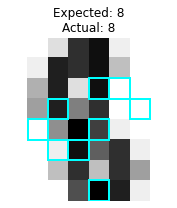

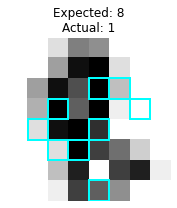

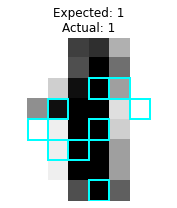

In [424]:
indices_of_correct_number = np.where(y_train == 1)
print(indices_of_correct_number)

map_misclassification_analysis(1192, 124, 25)

(array([  12,   15,   22,   34,   42,   45,   52,   68,   69,   94,  112,
        124,  128,  131,  132,  136,  139,  148,  149,  157,  164,  167,
        168,  171,  174,  178,  204,  209,  212,  224,  235,  236,  237,
        239,  242,  246,  251,  253,  258,  260,  265,  270,  288,  301,
        317,  322,  329,  350,  351,  353,  361,  367,  370,  373,  381,
        411,  430,  442,  446,  448,  456,  473,  485,  498,  502,  507,
        508,  519,  525,  547,  559,  561,  571,  595,  616,  620,  635,
        653,  657,  665,  681,  686,  693,  698,  700,  706,  741,  746,
        747,  787,  797,  799,  813,  831,  841,  842,  846,  853,  885,
        932,  935,  964,  978,  983,  984, 1015, 1026, 1029, 1046, 1068,
       1075, 1099, 1143, 1177, 1187, 1202, 1204, 1215, 1221, 1224, 1225,
       1239, 1242, 1258, 1260, 1268, 1301, 1303, 1310, 1314, 1315, 1326,
       1330, 1341]),)


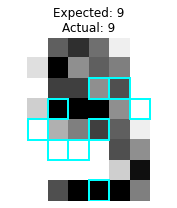

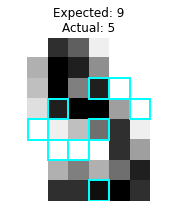

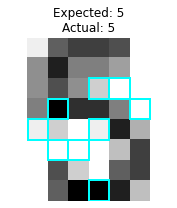

In [426]:
indices_of_correct_number = np.where(y_train == 5)
print(indices_of_correct_number)

map_misclassification_analysis(1275, 130, 12)